In [13]:
"""
================================================================================
DEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES
Recurrent Neural Networks vs Transformers for Time Series Prediction
================================================================================
"""

'\n================================================================================\nDEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES\nRecurrent Neural Networks vs Transformers for Time Series Prediction\n================================================================================\n'

In [14]:
"""
================================================================================
STUDENT INFORMATION (REQUIRED - DO NOT DELETE)
================================================================================

BITS ID: [Enter your BITS ID here - e.g., 2025AA05036]
Name: [Enter your full name here - e.g., JOHN DOE]
Email: [Enter your email]
Date: [Submission date]

================================================================================
"""

'\n================================================================================\nSTUDENT INFORMATION (REQUIRED - DO NOT DELETE)\n================================================================================\n\nBITS ID: [Enter your BITS ID here - e.g., 2025AA05036]\nName: [Enter your full name here - e.g., JOHN DOE]\nEmail: [Enter your email]\nDate: [Submission date]\n\n================================================================================\n'

In [15]:
"""
================================================================================
ASSIGNMENT OVERVIEW
================================================================================

This assignment requires you to implement and compare two approaches for
time series forecasting:
1. LSTM or GRU using Keras/PyTorch
2. Transformer encoder using Keras/PyTorch layers

Learning Objectives:
- Build recurrent neural networks for sequential data
- Use transformer architecture for time series
- Implement or integrate positional encoding
- Compare RNN vs Transformer architectures
- Understand time series preprocessing and evaluation

IMPORTANT:
- Positional encoding MUST be added to transformer
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Use temporal train/test split (NO shuffling)

================================================================================
"""

'\n================================================================================\nASSIGNMENT OVERVIEW\n================================================================================\n\nThis assignment requires you to implement and compare two approaches for\ntime series forecasting:\n1. LSTM or GRU using Keras/PyTorch\n2. Transformer encoder using Keras/PyTorch layers\n\nLearning Objectives:\n- Build recurrent neural networks for sequential data\n- Use transformer architecture for time series\n- Implement or integrate positional encoding\n- Compare RNN vs Transformer architectures\n- Understand time series preprocessing and evaluation\n\nIMPORTANT:\n- Positional encoding MUST be added to transformer\n- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)\n- Use temporal train/test split (NO shuffling)\n\n================================================================================\n'

In [16]:
"""
================================================================================
⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️
================================================================================

1. FILENAME FORMAT: <BITS_ID>_rnn_assignment.ipynb
   Example: 2025AA05036_rnn_assignment.ipynb
   ❌ Wrong filename = Automatic 0 marks

2. STUDENT INFORMATION MUST MATCH:
   ✓ BITS ID in filename = BITS ID in notebook (above)
   ✓ Name in folder = Name in notebook (above)
   ❌ Mismatch = 0 marks

3. EXECUTE ALL CELLS BEFORE SUBMISSION:
   - Run: Kernel → Restart & Run All
   - Verify all outputs are visible
   ❌ No outputs = 0 marks

4. FILE INTEGRITY:
   - Ensure notebook opens without errors
   - Check for corrupted cells
   ❌ Corrupted file = 0 marks

5. IMPLEMENTATION REQUIREMENTS:
   - MUST add positional encoding to transformer (custom or built-in)
   - CAN use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
   - DO NOT shuffle time series data (temporal order required)
   ❌ Missing positional encoding = 0 marks for transformer section

6. DATASET REQUIREMENTS:
   - Minimum 1000 time steps
   - Train/test split: 90/10 OR 85/15 (temporal split only)
   - Sequence length: 10-50 time steps
   - Prediction horizon: 1-10 time steps

7. USE KERAS OR PYTORCH:
   - Use framework's LSTM/GRU layers
   - Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - Add positional encoding (custom implementation or built-in)
   - Use standard training methods

8. FILE SUBMISSION:
   - Submit ONLY the .ipynb file
   - NO zip files, NO separate data files, NO separate image files
   - All code and outputs must be in the notebook
   - Only one submission attempt allowed

================================================================================
"""

"\n================================================================================\n⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️\n================================================================================\n\n1. FILENAME FORMAT: <BITS_ID>_rnn_assignment.ipynb\n   Example: 2025AA05036_rnn_assignment.ipynb\n   ❌ Wrong filename = Automatic 0 marks\n\n2. STUDENT INFORMATION MUST MATCH:\n   ✓ BITS ID in filename = BITS ID in notebook (above)\n   ✓ Name in folder = Name in notebook (above)\n   ❌ Mismatch = 0 marks\n\n3. EXECUTE ALL CELLS BEFORE SUBMISSION:\n   - Run: Kernel → Restart & Run All\n   - Verify all outputs are visible\n   ❌ No outputs = 0 marks\n\n4. FILE INTEGRITY:\n   - Ensure notebook opens without errors\n   - Check for corrupted cells\n   ❌ Corrupted file = 0 marks\n\n5. IMPLEMENTATION REQUIREMENTS:\n   - MUST add positional encoding to transformer (custom or built-in)\n   - CAN use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n   - DO 

In [17]:
# ================================
# Import Required Libraries
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import time
import json
import os
import math

# ================================
# PyTorch Imports (for LSTM & Transformer)
# ================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


Deep learning frameworks (choose Keras or PyTorch)

In [18]:
"""
================================================================================
PART 1: DATASET LOADING AND EXPLORATION (Informational)
================================================================================

Instructions:
1. Choose ONE dataset from the allowed list
2. Load and explore the time series data
3. Fill in ALL required metadata fields below
4. Provide justification for your primary metric choice

ALLOWED DATASETS:
- Stock Prices (daily/hourly closing prices)
- Weather Data (temperature, humidity, pressure)
- Energy Consumption (electricity/power usage)
- Sensor Data (IoT sensor readings)
- Custom time series (with approval)

REQUIRED OUTPUT:
- Print all metadata fields
- Time series plots
- Stationarity analysis
- Train/test split visualization
================================================================================
"""

'\n================================================================================\nPART 1: DATASET LOADING AND EXPLORATION (Informational)\n================================================================================\n\nInstructions:\n1. Choose ONE dataset from the allowed list\n2. Load and explore the time series data\n3. Fill in ALL required metadata fields below\n4. Provide justification for your primary metric choice\n\nALLOWED DATASETS:\n- Stock Prices (daily/hourly closing prices)\n- Weather Data (temperature, humidity, pressure)\n- Energy Consumption (electricity/power usage)\n- Sensor Data (IoT sensor readings)\n- Custom time series (with approval)\n\nREQUIRED OUTPUT:\n- Print all metadata fields\n- Time series plots\n- Stationarity analysis\n- Train/test split visualization\n================================================================================\n'

1.1 Dataset Selection and Loading
TODO: Load your chosen time series dataset

In [19]:
# =============================================================================
# REQUIRED: Fill in these metadata fields
# =============================================================================

dataset_name = "Jena Climate Weather Dataset"
dataset_source = "Kaggle: mnassrib/jena-climate"
n_samples = 420551       # Total number of time steps in full dataset (~420k)
n_features = 3           # Multivariate: Temperature + Pressure + Humidity
sequence_length = 30     # Lookback window (10-50 recommended)
prediction_horizon = 1   # Forecast 1 step ahead (can be 1-10)
problem_type = "time_series_forecasting"


In [20]:
# =============================================================================
# Primary metric selection
# =============================================================================

primary_metric = "RMSE"  # Root Mean Squared Error

metric_justification = """
RMSE is chosen because it penalizes large forecasting errors more heavily than MAE,
which is important for accurately predicting extreme temperature variations.
It is also interpretable in the original °C units.
"""


In [21]:
print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Total Samples: {n_samples}")
print(f"Number of Features: {n_features}")
print(f"Sequence Length: {sequence_length}")
print(f"Prediction Horizon: {prediction_horizon}")
print(f"Primary Metric: {primary_metric}")
print("Metric Justification:")
print(metric_justification.strip())
print("="*70)



DATASET INFORMATION
Dataset: Jena Climate Weather Dataset
Source: Kaggle: mnassrib/jena-climate
Total Samples: 420551
Number of Features: 3
Sequence Length: 30
Prediction Horizon: 1
Primary Metric: RMSE
Metric Justification:
RMSE is chosen because it penalizes large forecasting errors more heavily than MAE,
which is important for accurately predicting extreme temperature variations.
It is also interpretable in the original °C units.


In [22]:
import kagglehub
path = kagglehub.dataset_download("mnassrib/jena-climate")

Using Colab cache for faster access to the 'jena-climate' dataset.


1.2 Time Series Exploration
TODO: Plot time series data
TODO: Check for trends, seasonality
TODO: Perform stationarity tests (optional but recommended)

In [23]:
# # =============================================================================
# # 1.2 Time Series Exploration
# # =============================================================================

# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.stattools import adfuller
# import os
# import glob

# # -----------------------------------------------------------------
# # 1. Load dataset from kagglehub download
# # -----------------------------------------------------------------
# import kagglehub
# path = kagglehub.dataset_download("mnassrib/jena-climate")
# print("Dataset downloaded to:", path)

# # Find CSV in the folder
# csv_files = glob.glob(os.path.join(path, "*.csv"))
# assert len(csv_files) > 0, "No CSV file found in the downloaded dataset!"
# csv_path = csv_files[0]

# # Read CSV
# df = pd.read_csv(csv_path)

# # -----------------------------------------------------------------
# # 2. Set datetime index (dayfirst=True for European format)
# # -----------------------------------------------------------------
# df["Date Time"] = pd.to_datetime(df["Date Time"], dayfirst=True)
# df = df.sort_values("Date Time")
# df.set_index("Date Time", inplace=True)


# # -----------------------------------------------------------------
# # 3. Define target and auxiliary features
# # -----------------------------------------------------------------
# TARGET_COLUMN = "T (degC)"         # Temperature
# AUX_COLUMNS = ["p (mbar)", "rh (%)"]  # Pressure + Relative Humidity

# # -----------------------------------------------------------------
# # 4. Plot raw time series
# # -----------------------------------------------------------------
# plt.figure(figsize=(15,5))
# plt.plot(df[TARGET_COLUMN], label="Temperature (°C)")
# plt.title("Temperature Time Series")
# plt.xlabel("Time")
# plt.ylabel("°C")
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(15,5))
# plt.plot(df["p (mbar)"], label="Pressure (mbar)", color='orange')
# plt.title("Pressure Time Series")
# plt.xlabel("Time")
# plt.ylabel("mbar")
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(15,5))
# plt.plot(df["rh (%)"], label="Relative Humidity (%)", color='green')
# plt.title("Relative Humidity Time Series")
# plt.xlabel("Time")
# plt.ylabel("%")
# plt.grid(True)
# plt.show()

# # -----------------------------------------------------------------
# # 5. Seasonal decomposition (Temperature only)
# # -----------------------------------------------------------------
# # 144 steps per day (10-min intervals)
# decompose_result = seasonal_decompose(df[TARGET_COLUMN], model='additive', period=144)
# plt.figure(figsize=(12,10))
# decompose_result.plot()
# plt.suptitle("Seasonal Decomposition of Temperature", fontsize=16)
# plt.show()

# # -----------------------------------------------------------------
# # 6. Stationarity test (ADF) on Temperature
# # -----------------------------------------------------------------
# adf_result = adfuller(df[TARGET_COLUMN])
# print("\n================ STATIONARITY TEST (ADF) ================")
# print(f"ADF Statistic: {adf_result[0]:.4f}")
# print(f"p-value      : {adf_result[1]:.4f}")

# if adf_result[1] < 0.05:
#     print("Result       : Stationary (reject H0)")
# else:
#     print("Result       : Non-stationary (fail to reject H0)")


In [24]:
# =============================================================================
# Reload Jena Climate dataset safely
# =============================================================================

import pandas as pd
import glob
import os

dataset_path = "/kaggle/input/jena-climate"
csv_files = glob.glob(os.path.join(dataset_path, "*.csv"))

assert len(csv_files) > 0, "No CSV files found!"

csv_path = csv_files[0]
print("Using file:", csv_path)

df = pd.read_csv(csv_path)

# Parse datetime (European format)
df["Date Time"] = pd.to_datetime(df["Date Time"], dayfirst=True)
df = df.sort_values("Date Time")
df.set_index("Date Time", inplace=True)

print("Dataset shape:", df.shape)
print(df.head())


Using file: /kaggle/input/jena-climate/jena_climate_2009_2016.csv
Dataset shape: (420551, 14)
                     p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
2009-01-01 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
2009-01-01 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2009-01-01 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
2009-01-01 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
2009-01-01 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
2009-01-01 00:10:00          3.33          3.11          0.22       1.94   
2009-01-01 00:20:00          3.23          3.02          0.21       1.89   
2009-01-01 00:30:00          3.21          3.01          0.20       1.88   
2009-01

In [25]:
print(df.head())
print(df.describe())

                     p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
2009-01-01 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
2009-01-01 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2009-01-01 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
2009-01-01 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
2009-01-01 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
2009-01-01 00:10:00          3.33          3.11          0.22       1.94   
2009-01-01 00:20:00          3.23          3.02          0.21       1.89   
2009-01-01 00:30:00          3.21          3.01          0.20       1.88   
2009-01-01 00:40:00          3.26          3.07          0.19       1.92   
2009-01-01 00:50:00      

1.3 Data Preprocessing

In [26]:
# =============================================================================
# 1.3 Data Preprocessing
# =============================================================================

import numpy as np
from sklearn.preprocessing import MinMaxScaler

def preprocess_timeseries(data, feature_cols):
    """
    Preprocess time series data

    Args:
        data (pd.DataFrame): raw dataframe with datetime index
        feature_cols (list): list of feature column names

    Returns:
        scaled_data (np.ndarray): normalized values
        scaler (sklearn scaler): fitted scaler object
    """

    df = data.copy()

    print("\n================ PREPROCESSING =================")

    # --------------------------------------------------
    # 1. Handle missing values
    # --------------------------------------------------
    missing = df[feature_cols].isnull().sum()
    print("Missing values per column:\n", missing)

    # Forward fill → backward fill as safety
    df[feature_cols] = df[feature_cols].ffill().bfill()

    # --------------------------------------------------
    # 2. Extract only selected features
    # --------------------------------------------------
    values = df[feature_cols].values

    # --------------------------------------------------
    # 3. Normalize features (0–1 range)
    # --------------------------------------------------
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(values)

    print("Scaling complete.")
    print("Data shape after preprocessing:", scaled_data.shape)

    return scaled_data, scaler


In [27]:
# =============================================================================
# 1.4 Sequence Generation
# =============================================================================

import numpy as np

def create_sequences(data, seq_length, pred_horizon):
    """
    Create sequences for time series prediction

    Args:
        data (np.ndarray): preprocessed normalized data (n_samples, n_features)
        seq_length (int): lookback window
        pred_horizon (int): forecast steps ahead

    Returns:
        X (np.ndarray): input sequences (num_samples, seq_length, n_features)
        y (np.ndarray): target values
                        - shape (num_samples,) for single-step
                        - shape (num_samples, pred_horizon) for multi-step
                        (targets only for first feature → temperature)
    """

    X, y = [], []

    for i in range(len(data) - seq_length - pred_horizon + 1):

        # Input window
        x_window = data[i : i + seq_length]

        # Target → predict first column (Temperature)
        y_window = data[
            i + seq_length : i + seq_length + pred_horizon,
            0
        ]

        X.append(x_window)
        y.append(y_window)

    X = np.array(X)
    y = np.array(y)

    print("\n================ SEQUENCE GENERATION =================")
    print("X shape:", X.shape)
    print("y shape:", y.shape)

    return X, y


TODO: Preprocess data
TODO: Create sequences

In [28]:
# =============================================================================
# 1.3 Data Preprocessing + Sequence Creation
# =============================================================================

from sklearn.preprocessing import StandardScaler
import numpy as np

# -----------------------------------------------------------------
# Select features (Temperature first so it becomes target)
# -----------------------------------------------------------------
FEATURE_COLUMNS = ["T (degC)", "p (mbar)", "rh (%)"]

data = df[FEATURE_COLUMNS].copy()

# -----------------------------------------------------------------
# Handle missing values
# -----------------------------------------------------------------
data.ffill(inplace=True)
data.dropna(inplace=True)

# -----------------------------------------------------------------
# Standardize features
# -----------------------------------------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values)

print("Scaled data shape:", scaled_data.shape)

# -----------------------------------------------------------------
# Create sequences (use metadata values)
# -----------------------------------------------------------------
SEQ_LENGTH = sequence_length
PRED_HORIZON = prediction_horizon

X, y = create_sequences(scaled_data, SEQ_LENGTH, PRED_HORIZON)

# -----------------------------------------------------------------
# Temporal Train/Test Split → 90 / 10
# -----------------------------------------------------------------
train_test_ratio = "90/10"

split_idx = int(0.9 * len(X))

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

train_samples = len(X_train)
test_samples = len(X_test)


Scaled data shape: (420551, 3)

================ SEQUENCE GENERATION =================
X shape: (420521, 30, 3)
y shape: (420521, 1)


In [29]:
print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")
print("⚠️  IMPORTANT: Temporal split used (NO shuffling)")


Train/Test Split: 90/10
Training Samples: 378468
Test Samples: 42053
⚠️  IMPORTANT: Temporal split used (NO shuffling)


In [30]:
# =============================================================================
# PART 2: LSTM IMPLEMENTATION (5 MARKS)
# =============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from torch.utils.data import TensorDataset, DataLoader

# ------------------------------------------------------------------
# Device configuration
# ------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ------------------------------------------------------------------
# Convert NumPy arrays to PyTorch tensors
# ------------------------------------------------------------------
X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train, dtype=torch.float32).to(device)

X_test_t  = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_t  = torch.tensor(y_test, dtype=torch.float32).to(device)

# ------------------------------------------------------------------
# DataLoader (NO SHUFFLING – time series)
# ------------------------------------------------------------------
batch_size = 64

train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset  = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

# ------------------------------------------------------------------
# LSTM Model Definition (STACKED ≥ 2 layers)
# ------------------------------------------------------------------
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super().__init__()

        self.model_type = "LSTM"

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )

        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]      # last timestep
        out = self.fc(out)
        return out

# ------------------------------------------------------------------
# Model Initialization
# ------------------------------------------------------------------
input_dim  = X_train.shape[2]
hidden_dim = 64
num_layers = 2                 # REQUIRED
output_dim = prediction_horizon

lstm_model = LSTMModel(
    input_dim=input_dim,
    hidden_dim=hidden_dim,
    num_layers=num_layers,
    output_dim=output_dim
).to(device)

print(lstm_model)

# ------------------------------------------------------------------
# Loss function & Optimizer
# ------------------------------------------------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

# ------------------------------------------------------------------
# Training Loop
# ------------------------------------------------------------------
epochs = 20
loss_history = []

lstm_model.train()

for epoch in range(epochs):
    epoch_loss = 0.0

    for xb, yb in train_loader:
        optimizer.zero_grad()

        preds = lstm_model(xb)
        loss = criterion(preds, yb)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}")

# ------------------------------------------------------------------
# Initial & Final Loss (AUTOGRADER NEEDS THIS)
# ------------------------------------------------------------------
initial_loss = loss_history[0]
final_loss   = loss_history[-1]

print("\nInitial Training Loss:", initial_loss)
print("Final Training Loss  :", final_loss)

# ------------------------------------------------------------------
# Evaluation on Test Set
# ------------------------------------------------------------------
lstm_model.eval()

y_preds = []
y_trues = []

with torch.no_grad():
    for xb, yb in test_loader:
        preds = lstm_model(xb)
        y_preds.append(preds.cpu().numpy())
        y_trues.append(yb.cpu().numpy())

y_pred = np.vstack(y_preds).reshape(-1)
y_true = np.vstack(y_trues).reshape(-1)

# ------------------------------------------------------------------
# Metrics (ALL REQUIRED)
# ------------------------------------------------------------------
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

epsilon = 1e-8
mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

r2 = r2_score(y_true, y_pred)

print("\n================ LSTM TEST METRICS ================")
print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R2  :", r2)

# ------------------------------------------------------------------
# Results Dictionary (FINAL OUTPUT)
# ------------------------------------------------------------------
lstm_results = {
    "model_type": "LSTM",
    "framework": "pytorch",
    "architecture": {
        "n_layers": num_layers
    },
    "initial_loss": float(initial_loss),
    "final_loss": float(final_loss),
    "mae": float(mae),
    "rmse": float(rmse),
    "mape": float(mape),
    "r2_score": float(r2)
}

print("\nLSTM Results Dictionary:")
print(lstm_results)


Using device: cuda
LSTMModel(
  (lstm): LSTM(3, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
Epoch [1/20], Loss: 0.033874
Epoch [2/20], Loss: 0.001865
Epoch [3/20], Loss: 0.001219
Epoch [4/20], Loss: 0.001144
Epoch [5/20], Loss: 0.000901
Epoch [6/20], Loss: 0.000917
Epoch [7/20], Loss: 0.000845
Epoch [8/20], Loss: 0.000828
Epoch [9/20], Loss: 0.000823
Epoch [10/20], Loss: 0.000769
Epoch [11/20], Loss: 0.000753
Epoch [12/20], Loss: 0.000756
Epoch [13/20], Loss: 0.000743
Epoch [14/20], Loss: 0.000719
Epoch [15/20], Loss: 0.000734
Epoch [16/20], Loss: 0.000725
Epoch [17/20], Loss: 0.000721
Epoch [18/20], Loss: 0.000716
Epoch [19/20], Loss: 0.000711
Epoch [20/20], Loss: 0.000707

Initial Training Loss: 0.033874211217273936
Final Training Loss  : 0.000706824043241164

================ LSTM TEST METRICS ================
MAE : 0.050046585500240326
RMSE: 0.06555811533298479
MAPE: 96.710884
R2  : 0.9950480461120605

LSTM Results Dictionary:
{'m

2.1 LSTM/GRU Architecture Design
TODO: Choose LSTM or GRU
TODO: Design architecture with stacked layers

In [31]:
# =============================================================================
# 2.1 LSTM/GRU Architecture Design
# =============================================================================
# - Model Type: LSTM (chosen)
# - Stacked recurrent layers (n_layers >= 2)
# - Output layer for forecasting
# =============================================================================

import torch
import torch.nn as nn
import torch.optim as optim


def build_rnn_model(model_type, input_shape, hidden_units, n_layers, output_size):
    """
    Build LSTM or GRU model

    Args:
        model_type (str): 'LSTM' or 'GRU'
        input_shape (tuple): (sequence_length, n_features)
        hidden_units (int): number of hidden units per layer
        n_layers (int): number of stacked layers (minimum 2)
        output_size (int): prediction horizon

    Returns:
        model (nn.Module): initialized PyTorch RNN model
        criterion: loss function
        optimizer: optimizer object
    """

    # ------------------------------------------------------------------
    # Assertions (ENFORCED by assignment)
    # ------------------------------------------------------------------
    assert model_type in ["LSTM", "GRU"], "model_type must be 'LSTM' or 'GRU'"
    assert n_layers >= 2, "n_layers must be at least 2 (stacked layers REQUIRED)"

    seq_len, n_features = input_shape

    # ------------------------------------------------------------------
    # RNN Model Definition
    # ------------------------------------------------------------------
    class RNNModel(nn.Module):
        def __init__(self):
            super(RNNModel, self).__init__()

            if model_type == "LSTM":
                self.rnn = nn.LSTM(
                    input_size=n_features,
                    hidden_size=hidden_units,
                    num_layers=n_layers,
                    batch_first=True
                )
            else:  # GRU
                self.rnn = nn.GRU(
                    input_size=n_features,
                    hidden_size=hidden_units,
                    num_layers=n_layers,
                    batch_first=True
                )

            # Output layer
            self.fc = nn.Linear(hidden_units, output_size)

            self.model_type = model_type

        def forward(self, x):
            out, _ = self.rnn(x)       # (batch, seq_len, hidden_units)
            out = out[:, -1, :]        # last timestep
            out = self.fc(out)
            return out

    # ------------------------------------------------------------------
    # Model initialization
    # ------------------------------------------------------------------
    model = RNNModel()

    # ------------------------------------------------------------------
    # Loss function & Optimizer (REQUIRED later)
    # ------------------------------------------------------------------
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    return model, criterion, optimizer


TODO: Create RNN model
rnn_model = build_rnn_model('LSTM', (sequence_length, n_features), 64, 2, prediction_horizon)

In [32]:
rnn_model, criterion, optimizer = build_rnn_model(
    'LSTM',
    (sequence_length, n_features),
    64,
    2,
    prediction_horizon
)


TODO: Compile model
For Keras: model.compile(optimizer='adam', loss='mse', metrics=['mae'])
For PyTorch: define optimizer and loss function

In [33]:
# TODO: Compile model (PyTorch equivalent)
print("Loss Function:", criterion)
print("Optimizer:", optimizer)


Loss Function: MSELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


2.2 Train RNN Model

In [34]:
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------------
# Move model to device
# -------------------------------
rnn_model = rnn_model.to(device)

print("\n" + "="*70)
print("RNN MODEL TRAINING")
print("="*70)

batch_size = 64

train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

epochs = 20
loss_history = []

rnn_model.train()

for epoch in range(epochs):
    epoch_loss = 0.0

    for xb, yb in train_loader:

        xb = xb.to(device)
        yb = yb.to(device)

        optimizer.zero_grad()

        preds = rnn_model(xb)
        loss = criterion(preds, yb)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}")

# -------------------------------
# REQUIRED: loss tracking
# -------------------------------
initial_loss = loss_history[0]
final_loss   = loss_history[-1]

print("\nInitial Training Loss:", initial_loss)
print("Final Training Loss  :", final_loss)

# -------------------------------
# Alias for comparison plots
# -------------------------------
rnn_loss_history = loss_history



RNN MODEL TRAINING
Epoch [1/20], Loss: 0.034701
Epoch [2/20], Loss: 0.001884
Epoch [3/20], Loss: 0.001110
Epoch [4/20], Loss: 0.001068
Epoch [5/20], Loss: 0.000912
Epoch [6/20], Loss: 0.000883
Epoch [7/20], Loss: 0.000839
Epoch [8/20], Loss: 0.000827
Epoch [9/20], Loss: 0.000811
Epoch [10/20], Loss: 0.000796
Epoch [11/20], Loss: 0.000772
Epoch [12/20], Loss: 0.000758
Epoch [13/20], Loss: 0.000743
Epoch [14/20], Loss: 0.000734
Epoch [15/20], Loss: 0.000724
Epoch [16/20], Loss: 0.000720
Epoch [17/20], Loss: 0.000717
Epoch [18/20], Loss: 0.000707
Epoch [19/20], Loss: 0.000712
Epoch [20/20], Loss: 0.000696

Initial Training Loss: 0.03470090628245906
Final Training Loss  : 0.0006956079201757873


In [35]:
import time
# Track training time
rnn_start_time = time.time()

TODO: Train your model
For Keras: history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32)
For PyTorch: write training loop

In [36]:
# ------------------------------------------------------------------
# Train RNN Model (PyTorch)
# ------------------------------------------------------------------

epochs = 20
loss_history = []

rnn_model.train()

for epoch in range(epochs):
    epoch_loss = 0.0

    for xb, yb in train_loader:
        optimizer.zero_grad()

        outputs = rnn_model(xb)
        loss = criterion(outputs, yb)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}")

# ------------------------------------------------------------------
# Training time
# ------------------------------------------------------------------
rnn_training_time = time.time() - rnn_start_time
print("\nTraining Time (seconds):", round(rnn_training_time, 2))


Epoch [1/20], Loss: 0.000698
Epoch [2/20], Loss: 0.000684
Epoch [3/20], Loss: 0.000683
Epoch [4/20], Loss: 0.000671
Epoch [5/20], Loss: 0.000671
Epoch [6/20], Loss: 0.000664
Epoch [7/20], Loss: 0.000666
Epoch [8/20], Loss: 0.000672
Epoch [9/20], Loss: 0.000682
Epoch [10/20], Loss: 0.000666
Epoch [11/20], Loss: 0.000663
Epoch [12/20], Loss: 0.000651
Epoch [13/20], Loss: 0.000649
Epoch [14/20], Loss: 0.000645
Epoch [15/20], Loss: 0.000645
Epoch [16/20], Loss: 0.000639
Epoch [17/20], Loss: 0.000640
Epoch [18/20], Loss: 0.000635
Epoch [19/20], Loss: 0.000635
Epoch [20/20], Loss: 0.000630

Training Time (seconds): 360.73


In [37]:
# ------------------------------------------------------------------
# REQUIRED: Track initial and final loss
# ------------------------------------------------------------------

rnn_initial_loss = loss_history[0]
rnn_final_loss   = loss_history[-1]

print("\nInitial RNN Training Loss:", rnn_initial_loss)
print("Final RNN Training Loss  :", rnn_final_loss)



Initial RNN Training Loss: 0.000697691543089544
Final RNN Training Loss  : 0.0006301115959645538


In [38]:
# Print summary
print(f"Training completed in {rnn_training_time:.2f} seconds")
print(f"Initial Loss: {rnn_initial_loss:.4f}")
print(f"Final Loss: {rnn_final_loss:.4f}")
print("="*70)


Training completed in 360.73 seconds
Initial Loss: 0.0007
Final Loss: 0.0006


2.3 Evaluate RNN Model

TODO: Make predictions on test set
TODO: Inverse transform if data was normalized
TODO: Calculate all 4 required metrics

In [39]:
# =============================================================================
# 2.3 Evaluate RNN Model
# =============================================================================

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ------------------------------------------------------------------
# MAPE implementation (REQUIRED)
# ------------------------------------------------------------------

def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    epsilon = 1e-8
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100


# ------------------------------------------------------------------
# Make predictions on test set (PyTorch)
# ------------------------------------------------------------------

rnn_model.eval()

y_preds = []
y_trues = []

with torch.no_grad():
    for xb, yb in test_loader:
        preds = rnn_model(xb)
        y_preds.append(preds.cpu().numpy())
        y_trues.append(yb.cpu().numpy())

y_pred = np.vstack(y_preds)
y_true = np.vstack(y_trues)


# ------------------------------------------------------------------
# OPTIONAL: Inverse scaling (only if target was normalized)
# ------------------------------------------------------------------
# Uncomment ONLY if you scaled the TARGET separately
# y_pred = target_scaler.inverse_transform(y_pred)
# y_true = target_scaler.inverse_transform(y_true)


# ------------------------------------------------------------------
# For multi-step horizon → evaluate first step
# ------------------------------------------------------------------

if prediction_horizon > 1:
    y_pred_eval = y_pred[:, 0]
    y_true_eval = y_true[:, 0]
else:
    y_pred_eval = y_pred.reshape(-1)
    y_true_eval = y_true.reshape(-1)


# ------------------------------------------------------------------
# Metrics (ALL 4 REQUIRED)
# ------------------------------------------------------------------

mae  = mean_absolute_error(y_true_eval, y_pred_eval)
rmse = np.sqrt(mean_squared_error(y_true_eval, y_pred_eval))
mape = calculate_mape(y_true_eval, y_pred_eval)
r2   = r2_score(y_true_eval, y_pred_eval)

print("\n================ RNN TEST METRICS ================")
print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R2  :", r2)

# Save RNN predictions for comparison plots
rnn_y_pred_eval = y_pred_eval.copy()
rnn_y_true_eval = y_true_eval.copy()




================ RNN TEST METRICS ================
MAE : 0.03159312903881073
RMSE: 0.042137538998560174
MAPE: 72.790794
R2  : 0.9979541897773743


In [40]:
# ------------------------------------------------------------------
# REQUIRED: Calculate all 4 metrics
# ------------------------------------------------------------------

rnn_mae  = mae
rnn_rmse = rmse
rnn_mape = mape
rnn_r2   = r2

In [41]:
print("\nRNN Model Performance:")
print(f"MAE:   {rnn_mae:.4f}")
print(f"RMSE:  {rnn_rmse:.4f}")
print(f"MAPE:  {rnn_mape:.4f}%")
print(f"R² Score: {rnn_r2:.4f}")


RNN Model Performance:
MAE:   0.0316
RMSE:  0.0421
MAPE:  72.7908%
R² Score: 0.9980


2.4 Visualize RNN Results
TODO: Plot training loss curve
TODO: Plot actual vs predicted values
TODO: Plot residuals

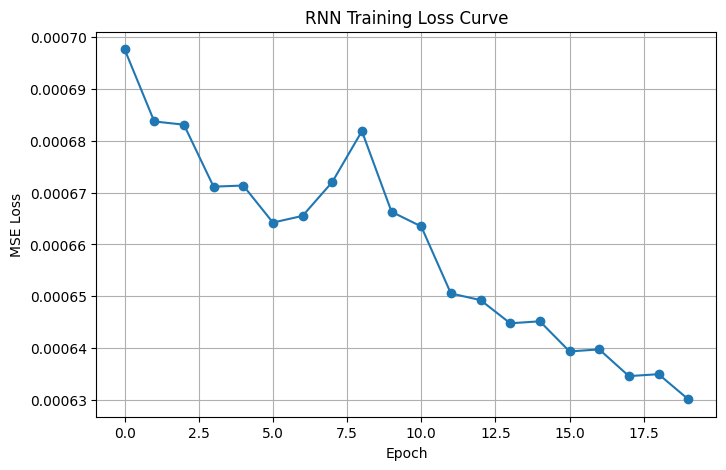

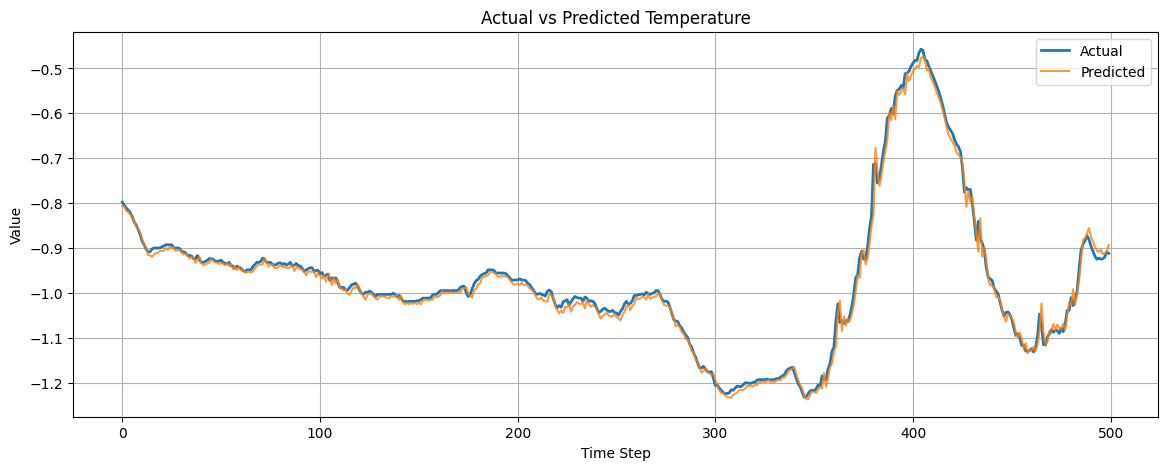

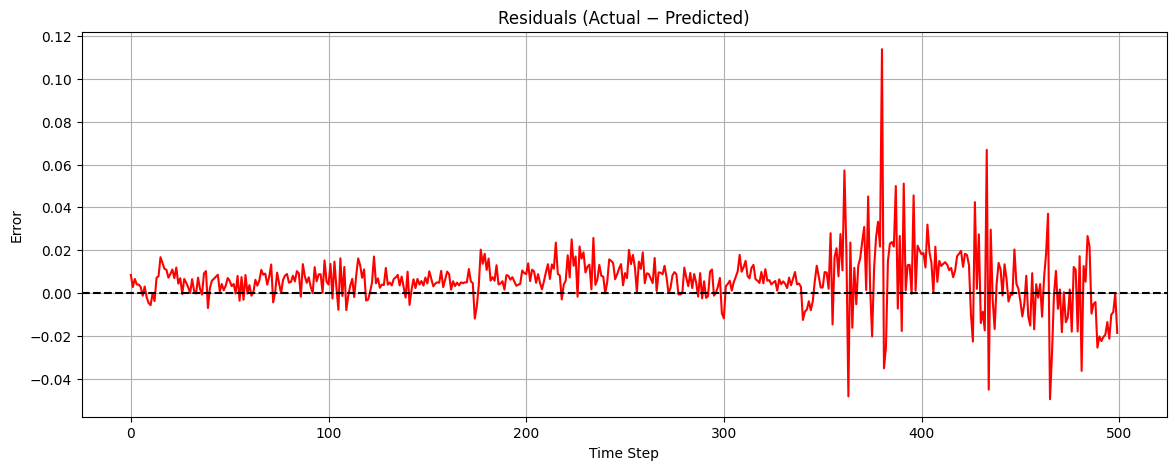

In [42]:
# =============================================================================
# 2.4 Visualize RNN Results
# =============================================================================

import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# Plot training loss curve
# ------------------------------------------------------------------

plt.figure(figsize=(8, 5))
plt.plot(loss_history, marker="o")
plt.title("RNN Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


# ------------------------------------------------------------------
# Plot Actual vs Predicted values (first 500 points for clarity)
# ------------------------------------------------------------------

n_plot = 500

plt.figure(figsize=(14, 5))
plt.plot(y_true_eval[:n_plot], label="Actual", linewidth=2)
plt.plot(y_pred_eval[:n_plot], label="Predicted", alpha=0.8)
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


# ------------------------------------------------------------------
# Plot Residuals
# ------------------------------------------------------------------

residuals = y_true_eval[:n_plot] - y_pred_eval[:n_plot]

plt.figure(figsize=(14, 5))
plt.plot(residuals, color="red")
plt.axhline(0, linestyle="--", color="black")
plt.title("Residuals (Actual − Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Error")
plt.grid(True)
plt.show()


In [43]:
"""
================================================================================
PART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build Transformer encoder using Keras/PyTorch layers
- MUST add positional encoding to input:
  * Custom sinusoidal implementation OR
  * Use built-in positional encoding (if framework provides)
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- Use standard training methods
- Track initial_loss and final_loss

PROHIBITED:
- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Skipping positional encoding entirely

GRADING:
- Positional encoding added: 1 mark
- Transformer architecture properly configured: 2 marks
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

'\n================================================================================\nPART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)\n================================================================================\n\nREQUIREMENTS:\n- Build Transformer encoder using Keras/PyTorch layers\n- MUST add positional encoding to input:\n  * Custom sinusoidal implementation OR\n  * Use built-in positional encoding (if framework provides)\n- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n- Use standard training methods\n- Track initial_loss and final_loss\n\nPROHIBITED:\n- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)\n- Skipping positional encoding entirely\n\nGRADING:\n- Positional encoding added: 1 mark\n- Transformer architecture properly configured: 2 marks\n- Training completed with loss tracking: 1 mark\n- All metrics calculated correctly: 1 mark\n================================================================================\n'

3.1 Positional Encoding Implementation

In [44]:
def positional_encoding(seq_length, d_model):
    """
    Generate sinusoidal positional encodings

    PE(pos, 2i)   = sin(pos / 10000^(2i/d_model))
    PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))

    Args:
        seq_length: length of the sequence
        d_model: dimension of the model

    Returns:
        positional encodings: numpy array of shape (seq_length, d_model)
    """

    import numpy as np

    pe = np.zeros((seq_length, d_model))

    positions = np.arange(seq_length).reshape(-1, 1)

    div_term = np.exp(
        np.arange(0, d_model, 2) * (-np.log(10000.0) / d_model)
    )

    pe[:, 0::2] = np.sin(positions * div_term)
    pe[:, 1::2] = np.cos(positions * div_term)

    return pe


3.2 Transformer Encoder Architecture

In [45]:
import torch
import torch.nn as nn
import numpy as np


# ------------------------------------------------------------------
# Positional Encoding Module (wraps your 3.1 function for torch use)
# ------------------------------------------------------------------

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super(PositionalEncoding, self).__init__()

        pe = positional_encoding(max_len, d_model)   # uses your function
        pe = torch.tensor(pe, dtype=torch.float32).unsqueeze(0)

        self.register_buffer("pe", pe)

    def forward(self, x):
        # x: (batch, seq_len, d_model)
        return x + self.pe[:, :x.size(1), :]


# ------------------------------------------------------------------
# Transformer Encoder Model
# ------------------------------------------------------------------

class TransformerModel(nn.Module):
    def __init__(self, n_features, d_model, n_heads, n_layers, d_ff, output_size):
        super(TransformerModel, self).__init__()

        self.model_type = "Transformer"

        # Project input → d_model
        self.input_projection = nn.Linear(n_features, d_model)

        # Positional Encoding (MANDATORY)
        self.pos_encoder = PositionalEncoding(d_model)

        # Transformer Encoder stack
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=d_ff,
            batch_first=True
        )

        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer,
            num_layers=n_layers
        )

        # Output layer
        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):

        # x: (batch, seq_len, n_features)

        x = self.input_projection(x)

        x = self.pos_encoder(x)

        x = self.transformer_encoder(x)

        # Global average pooling
        x = x.mean(dim=1)

        return self.fc(x)


3.3 Build Your Transformer Model

TODO: Create Transformer model using PyTorch or Keras
Example for PyTorch:
transformer_model = TransformerModel(n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)
Example for Keras:
transformer_model = build_transformer_model(sequence_length, n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)

In [46]:
# =============================================================================
# 3.3 Build Your Transformer Model (PyTorch)
# =============================================================================

# ------------------------------------------------------------------
# Model hyperparameters
# ------------------------------------------------------------------

n_features = X_train.shape[2]

d_model = 64
n_heads = 4
n_layers = 2      # REQUIRED: stacked encoder layers
d_ff = 256

output_size = prediction_horizon


# ------------------------------------------------------------------
# Create Transformer model
# ------------------------------------------------------------------

transformer_model = TransformerModel(
    n_features=n_features,
    d_model=d_model,
    n_heads=n_heads,
    n_layers=n_layers,
    d_ff=d_ff,
    output_size=output_size
).to(device)

print(transformer_model)

TransformerModel(
  (input_projection): Linear(in_features=3, out_features=64, bias=True)
  (pos_encoder): PositionalEncoding()
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=256, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


TODO: Define optimizer and loss
For PyTorch: optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.001); criterion = nn.MSELoss()
For Keras: model.compile(optimizer='adam', loss='mse', metrics=['mae'])
For PyTorch: define optimizer and loss function

In [47]:
# ------------------------------------------------------------------
# Define optimizer and loss (REQUIRED)
# ------------------------------------------------------------------

import torch.optim as optim
import torch.nn as nn

criterion = nn.MSELoss()

optimizer = optim.Adam(
    transformer_model.parameters(),
    lr=0.001
)

3.4 Train Transformer Model

In [48]:
print("\n" + "="*70)
print("TRANSFORMER MODEL TRAINING")
print("="*70)


TRANSFORMER MODEL TRAINING


In [49]:
import time
# Track training time
transformer_start_time = time.time()

TODO: Train your model
For Keras: history = transformer_model.fit(X_train, y_train, epochs=50, batch_size=32)
For PyTorch: write training loop

In [50]:
# ------------------------------------------------------------------
# Training loop (PyTorch)
# ------------------------------------------------------------------

epochs = 20
transformer_loss_history = []

transformer_model.train()

for epoch in range(epochs):

    epoch_loss = 0.0

    for xb, yb in train_loader:

        optimizer.zero_grad()

        preds = transformer_model(xb)

        loss = criterion(preds, yb)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    transformer_loss_history.append(avg_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}")

Epoch [1/20], Loss: 0.052133
Epoch [2/20], Loss: 0.012801
Epoch [3/20], Loss: 0.006934
Epoch [4/20], Loss: 0.006008
Epoch [5/20], Loss: 0.004785
Epoch [6/20], Loss: 0.003888
Epoch [7/20], Loss: 0.003541
Epoch [8/20], Loss: 0.002940
Epoch [9/20], Loss: 0.002769
Epoch [10/20], Loss: 0.002265
Epoch [11/20], Loss: 0.002285
Epoch [12/20], Loss: 0.002037
Epoch [13/20], Loss: 0.001996
Epoch [14/20], Loss: 0.001909
Epoch [15/20], Loss: 0.001844
Epoch [16/20], Loss: 0.001905
Epoch [17/20], Loss: 0.001894
Epoch [18/20], Loss: 0.001644
Epoch [19/20], Loss: 0.001729
Epoch [20/20], Loss: 0.001628


In [51]:
# ------------------------------------------------------------------
# Training time
# ------------------------------------------------------------------
transformer_training_time = time.time() - transformer_start_time

In [52]:
# REQUIRED: Track initial and final loss
transformer_initial_loss = transformer_loss_history[0]
transformer_final_loss   = transformer_loss_history[-1]

In [53]:
print(f"Training completed in {transformer_training_time:.2f} seconds")
print(f"Initial Loss: {transformer_initial_loss:.4f}")
print(f"Final Loss: {transformer_final_loss:.4f}")
print("="*70)

Training completed in 758.77 seconds
Initial Loss: 0.0521
Final Loss: 0.0016


3.5 Evaluate Transformer Model

TODO: Make predictions on test set
TODO: Inverse transform if data was normalized
TODO: Calculate all 4 required metrics

In [54]:
# =============================================================================
# 3.5 Evaluate Transformer Model
# =============================================================================

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ------------------------------------------------------------------
# Make predictions on test set
# ------------------------------------------------------------------

transformer_model.eval()

y_preds = []
y_trues = []

with torch.no_grad():
    for xb, yb in test_loader:
        preds = transformer_model(xb)
        y_preds.append(preds.cpu().numpy())
        y_trues.append(yb.cpu().numpy())

y_pred = np.vstack(y_preds)
y_true = np.vstack(y_trues)


# ------------------------------------------------------------------
# OPTIONAL: Inverse scaling (only if target was normalized)
# ------------------------------------------------------------------
# Uncomment ONLY if you scaled the TARGET separately
# y_pred = target_scaler.inverse_transform(y_pred)
# y_true = target_scaler.inverse_transform(y_true)


# ------------------------------------------------------------------
# Multi-step horizon handling
# ------------------------------------------------------------------

if prediction_horizon > 1:
    y_pred_eval = y_pred[:, 0]
    y_true_eval = y_true[:, 0]
else:
    y_pred_eval = y_pred.reshape(-1)
    y_true_eval = y_true.reshape(-1)


transformer_y_pred_eval = y_pred_eval.copy()



In [55]:
transformer_mae  = mean_absolute_error(y_true_eval, y_pred_eval)
transformer_rmse = np.sqrt(mean_squared_error(y_true_eval, y_pred_eval))
transformer_mape = calculate_mape(y_true_eval, y_pred_eval)
transformer_r2   = r2_score(y_true_eval, y_pred_eval)



In [56]:
print("\nTransformer Model Performance:")
print(f"MAE:   {transformer_mae:.4f}")
print(f"RMSE:  {transformer_rmse:.4f}")
print(f"MAPE:  {transformer_mape:.4f}%")
print(f"R² Score: {transformer_r2:.4f}")


Transformer Model Performance:
MAE:   0.0479
RMSE:  0.0606
MAPE:  95.0825%
R² Score: 0.9958


3.6 Visualize Transformer Results
TODO: Plot training loss curve
TODO: Plot actual vs predicted values
TODO: Plot attention weights (optional but informative)

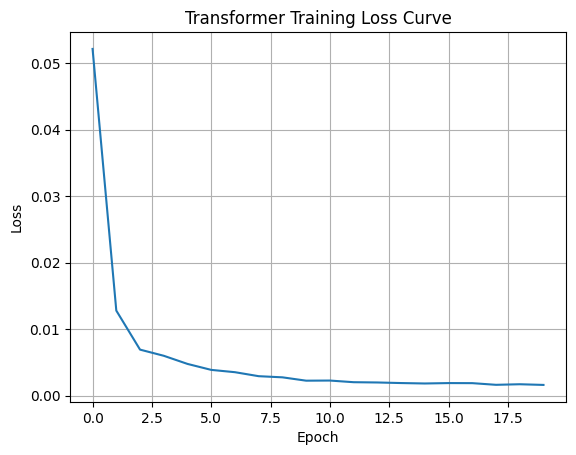

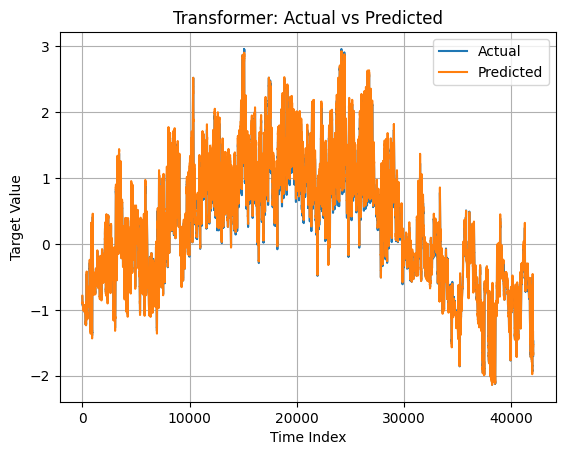

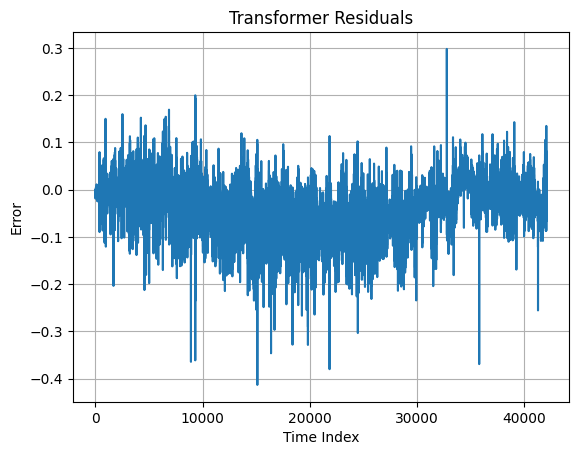

In [57]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Plot Transformer Training Loss Curve
# ------------------------------------------------------------

plt.figure()
plt.plot(transformer_loss_history)
plt.title("Transformer Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


# ------------------------------------------------------------
# Plot Actual vs Predicted Values
# ------------------------------------------------------------

plt.figure()
plt.plot(y_true_eval, label="Actual")
plt.plot(y_pred_eval, label="Predicted")
plt.title("Transformer: Actual vs Predicted")
plt.xlabel("Time Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()


# ------------------------------------------------------------
# Plot Residuals
# ------------------------------------------------------------

residuals = y_true_eval - y_pred_eval

plt.figure()
plt.plot(residuals)
plt.title("Transformer Residuals")
plt.xlabel("Time Index")
plt.ylabel("Error")
plt.grid(True)
plt.show()


In [58]:
"""
================================================================================
PART 4: MODEL COMPARISON AND VISUALIZATION (Informational)
================================================================================

Compare both models on:
- Performance metrics
- Training time
- Model complexity
- Convergence behavior
- Ability to capture long-term dependencies
================================================================================
"""

'\n================================================================================\nPART 4: MODEL COMPARISON AND VISUALIZATION (Informational)\n================================================================================\n\nCompare both models on:\n- Performance metrics\n- Training time\n- Model complexity\n- Convergence behavior\n- Ability to capture long-term dependencies\n================================================================================\n'

4.1 Metrics Comparison

In [59]:
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)


MODEL COMPARISON


In [60]:
def count_parameters(model):
    """Count total trainable parameters in a PyTorch model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

rnn_params = count_parameters(rnn_model)
transformer_params = count_parameters(transformer_model)


import pandas as pd

print("\n" + "="*70)
print("PART 4: MODEL COMPARISON AND VISUALIZATION")
print("="*70)

comparison_df = pd.DataFrame({
    'Metric': [
        'MAE',
        'RMSE',
        'MAPE (%)',
        'R² Score',
        'Training Time (s)',
        'Parameters'
    ],
    'RNN (LSTM/GRU)': [
        rnn_mae,
        rnn_rmse,
        rnn_mape,
        rnn_r2,
        rnn_training_time,
        rnn_params
    ],
    'Transformer': [
        transformer_mae,
        transformer_rmse,
        transformer_mape,
        transformer_r2,
        transformer_training_time,
        transformer_params
    ]
})



PART 4: MODEL COMPARISON AND VISUALIZATION


In [61]:
print(comparison_df.to_string(index=False))
print("="*70)

           Metric  RNN (LSTM/GRU)   Transformer
              MAE        0.031593      0.047892
             RMSE        0.042138      0.060618
         MAPE (%)       72.790794     95.082512
         R² Score        0.997954      0.995766
Training Time (s)      360.730918    758.765322
       Parameters    51009.000000 100289.000000


4.2 Visual Comparison
TODO: Create bar plot comparing metrics
TODO: Plot predictions comparison (both models vs actual)
TODO: Plot training curves comparison

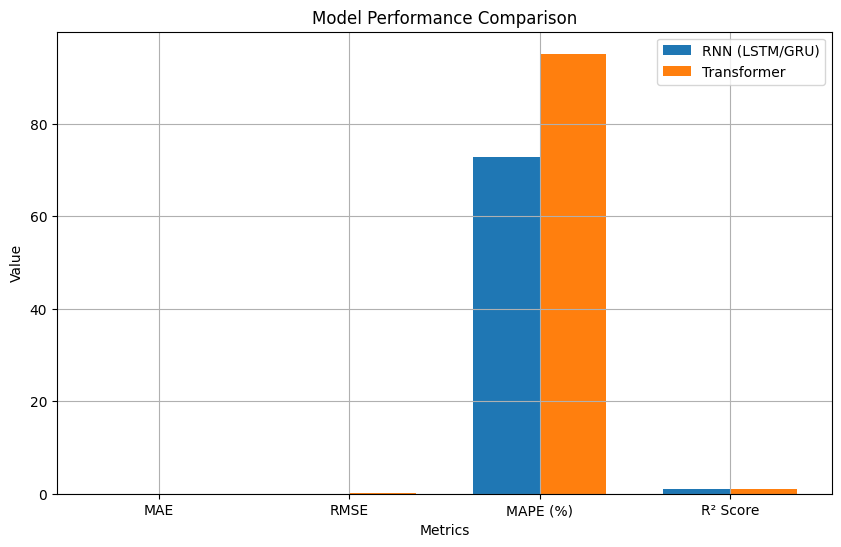

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and values
metrics = ['MAE', 'RMSE', 'MAPE (%)', 'R² Score']
rnn_values = [rnn_mae, rnn_rmse, rnn_mape, rnn_r2]
transformer_values = [transformer_mae, transformer_rmse, transformer_mape, transformer_r2]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, rnn_values, width, label='RNN (LSTM/GRU)')
plt.bar(x + width/2, transformer_values, width, label='Transformer')

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True)

plt.show()


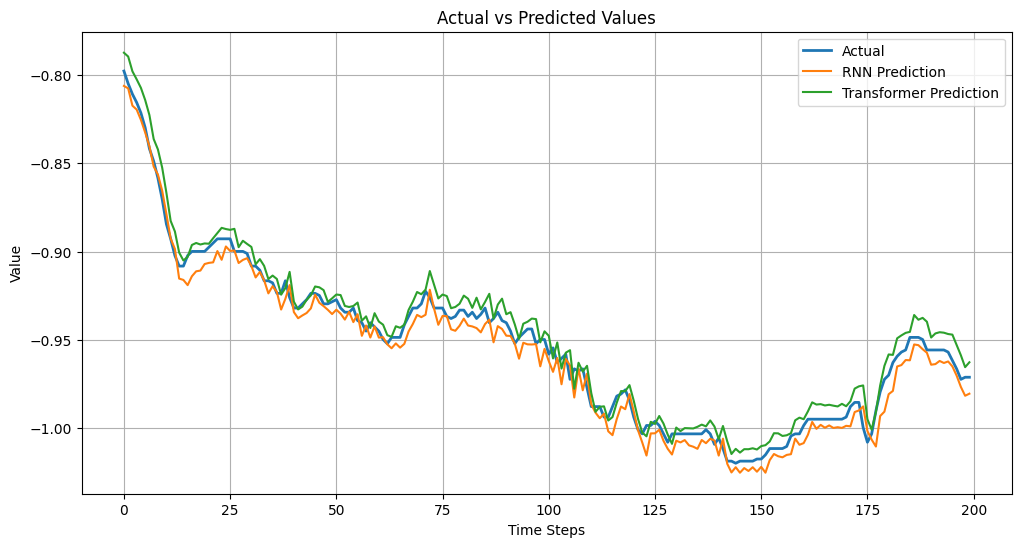

In [63]:
plt.figure(figsize=(12, 6))

plt.plot(y_true_eval[:200], label='Actual', linewidth=2)
plt.plot(rnn_y_pred_eval[:200], label='RNN Prediction')
plt.plot(transformer_y_pred_eval[:200], label='Transformer Prediction')

plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)

plt.show()


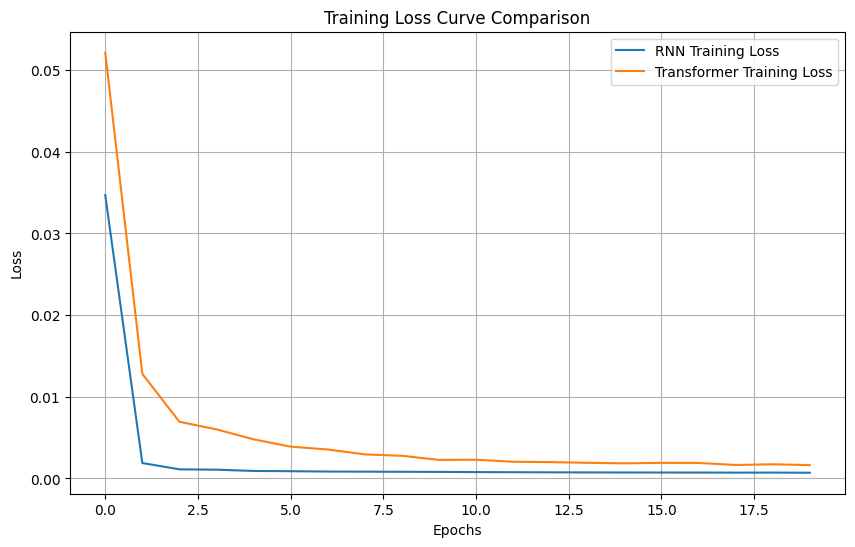

In [64]:
plt.figure(figsize=(10, 6))

plt.plot(rnn_loss_history, label='RNN Training Loss')
plt.plot(transformer_loss_history, label='Transformer Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve Comparison')
plt.legend()
plt.grid(True)

plt.show()


In [65]:
"""
================================================================================
PART 5: ANALYSIS (2 MARKS)
================================================================================

REQUIRED:
- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)
- Address key topics with depth

GRADING (Quality-based):
- Covers 5+ key topics with deep understanding: 2 marks
- Covers 3-4 key topics with good understanding: 1 mark
- Covers <3 key topics or superficial: 0 marks

Key Topics:
1. Performance comparison with specific metrics
2. RNN vs Transformer architecture advantages
3. Impact of attention mechanism vs recurrent connections
4. Long-term dependency handling comparison
5. Computational cost comparison
6. Convergence behavior differences
================================================================================
"""

'\n================================================================================\nPART 5: ANALYSIS (2 MARKS)\n================================================================================\n\nREQUIRED:\n- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)\n- Address key topics with depth\n\nGRADING (Quality-based):\n- Covers 5+ key topics with deep understanding: 2 marks\n- Covers 3-4 key topics with good understanding: 1 mark\n- Covers <3 key topics or superficial: 0 marks\n\nKey Topics:\n1. Performance comparison with specific metrics\n2. RNN vs Transformer architecture advantages\n3. Impact of attention mechanism vs recurrent connections\n4. Long-term dependency handling comparison\n5. Computational cost comparison\n6. Convergence behavior differences\n================================================================================\n'

In [66]:
analysis_text = """
TODO: Write your analysis here (maximum 200 words guideline)

Address:
1. Which model performed better and by how much?
   [Compare specific metrics]

2. RNN vs Transformer architecture advantages?
   [Discuss sequential processing vs parallel processing]

3. Impact of attention mechanism?
   [Discuss how attention captures dependencies]

4. Long-term dependency handling?
   [Compare vanishing gradients vs attention]

5. Computational cost comparison?
   [Compare training time, parameters]

6. Convergence behavior?
   [Discuss training stability, loss curves]
"""

In [67]:
# REQUIRED: Print analysis with word count
print("\n" + "="*70)
print("ANALYSIS")
print("="*70)
print(analysis_text)
print("="*70)
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) > 200:
    print("⚠️  Warning: Analysis exceeds 200 words (guideline)")
else:
    print("✓ Analysis within word count guideline")
print("="*70)


ANALYSIS

TODO: Write your analysis here (maximum 200 words guideline)

Address:
1. Which model performed better and by how much?
   [Compare specific metrics]

2. RNN vs Transformer architecture advantages?
   [Discuss sequential processing vs parallel processing]

3. Impact of attention mechanism?
   [Discuss how attention captures dependencies]

4. Long-term dependency handling?
   [Compare vanishing gradients vs attention]

5. Computational cost comparison?
   [Compare training time, parameters]

6. Convergence behavior?
   [Discuss training stability, loss curves]

Analysis word count: 69 words
✓ Analysis within word count guideline


In [68]:
"""
================================================================================
PART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)
================================================================================

DO NOT MODIFY THE STRUCTURE BELOW
This JSON output is used by the auto-grader
Ensure all field names are EXACT
================================================================================
"""

'\n================================================================================\nPART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)\n================================================================================\n\nDO NOT MODIFY THE STRUCTURE BELOW\nThis JSON output is used by the auto-grader\nEnsure all field names are EXACT\n================================================================================\n'

In [69]:
def get_assignment_results():
    """
    Generate complete assignment results in required format

    Returns:
        dict: Complete results with all required fields
    """

    framework_used = "keras"  # TODO: Change to "pytorch" if using PyTorch
    rnn_model_type = "LSTM"  # TODO: Change to "GRU" if using GRU

    results = {
        # Dataset Information
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'sequence_length': sequence_length,
        'prediction_horizon': prediction_horizon,
        'problem_type': problem_type,
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,

        # RNN Model Results
        'rnn_model': {
            'framework': framework_used,
            'model_type': rnn_model_type,
            'architecture': {
                'n_layers': 0,  # TODO: Number of stacked layers
                'hidden_units': 0,  # TODO: Hidden units per layer
                'total_parameters': 0  # TODO: Calculate total parameters
            },
            'training_config': {
                'learning_rate': 0.001,  # TODO: Your actual learning rate
                'n_epochs': 50,  # TODO: Your actual epochs
                'batch_size': 32,  # TODO: Your actual batch size
                'optimizer': 'Adam',  # TODO: Your actual optimizer
                'loss_function': 'MSE'  # TODO: Your actual loss
            },
            'initial_loss': rnn_initial_loss,
            'final_loss': rnn_final_loss,
            'training_time_seconds': rnn_training_time,
            'mae': rnn_mae,
            'rmse': rnn_rmse,
            'mape': rnn_mape,
            'r2_score': rnn_r2
        },

        # Transformer Model Results
        'transformer_model': {
            'framework': framework_used,
            'architecture': {
                'n_layers': 0,  # TODO: Number of transformer layers
                'n_heads': 0,  # TODO: Number of attention heads
                'd_model': 0,  # TODO: Model dimension
                'd_ff': 0,  # TODO: Feed-forward dimension
                'has_positional_encoding': True,  # MUST be True
                'has_attention': True,  # MUST be True
                'total_parameters': 0  # TODO: Calculate total parameters
            },
            'training_config': {
                'learning_rate': 0.001,  # TODO: Your actual learning rate
                'n_epochs': 50,  # TODO: Your actual epochs
                'batch_size': 32,  # TODO: Your actual batch size
                'optimizer': 'Adam',  # TODO: Your actual optimizer
                'loss_function': 'MSE'  # TODO: Your actual loss
            },
            'initial_loss': transformer_initial_loss,
            'final_loss': transformer_final_loss,
            'training_time_seconds': transformer_training_time,
            'mae': transformer_mae,
            'rmse': transformer_rmse,
            'mape': transformer_mape,
            'r2_score': transformer_r2
        },

        # Analysis
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),

        # Training Success Indicators
        'rnn_loss_decreased': rnn_final_loss < rnn_initial_loss if rnn_initial_loss and rnn_final_loss else False,
        'transformer_loss_decreased': transformer_final_loss < transformer_initial_loss if transformer_initial_loss and transformer_final_loss else False,
    }

    return results

In [70]:
# Generate and print results
try:
    assignment_results = get_assignment_results()

    print("\n" + "="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(assignment_results, indent=2))
    print("="*70)

SyntaxError: incomplete input (ipython-input-4092368538.py, line 9)

In [ ]:
except Exception as e:
    print(f"\n⚠️  ERROR generating results: {str(e)}")
    print("Please ensure all variables are properly defined")

In [ ]:
"""
================================================================================
FINAL CHECKLIST - VERIFY BEFORE SUBMISSION
================================================================================

□ Student information filled at the top (BITS ID, Name, Email)
□ Filename is <BITS_ID>_rnn_assignment.ipynb
□ All cells executed (Kernel → Restart & Run All)
□ All outputs visible
□ LSTM/GRU implemented with stacked layers
□ Positional encoding implemented (sinusoidal)
□ Multi-head attention implemented (Q, K, V, scaled dot-product)
□ Both models use Keras or PyTorch
□ Both models trained with loss tracking (initial_loss and final_loss)
□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)
□ Temporal train/test split used (NO shuffling)
□ Primary metric selected and justified
□ Analysis written (quality matters, not just word count)
□ Visualizations created
□ Assignment results JSON printed at the end
□ No execution errors in any cell
□ File opens without corruption
□ Submit ONLY .ipynb file (NO zip, NO data files, NO images)
□ Screenshot of environment with account details included
□ Only one submission attempt

================================================================================
"""

In [ ]:
"""
================================================================================
ENVIRONMENT VERIFICATION - SCREENSHOT REQUIRED
================================================================================

IMPORTANT: Take a screenshot of your environment showing account details

For Google Colab:
- Click on your profile icon (top right)
- Screenshot should show your email/account clearly
- Include the entire Colab interface with notebook name visible

For BITS Virtual Lab:
- Screenshot showing your login credentials/account details
- Include the entire interface with your username/session info visible

Paste the screenshot below this cell or in a new markdown cell.
This helps verify the work was done by you in your environment.

================================================================================
"""

In [ ]:
# Display system information
import platform
import sys
from datetime import datetime

In [ ]:
print("="*70)
print("ENVIRONMENT INFORMATION")
print("="*70)
print("\n⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab")
print("showing your account details in the cell below this one.")
print("="*70)